In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import pylab as plt

# 10 class, categories at IQR

# Loading csv files for training
print("reading csv file")
csv = pd.read_csv('data_formatted_classified.csv', index_col=0)

pd_train_data = csv.iloc[810000:891000]
pd_test_data = csv.iloc[891000:900000]
benchmark_data = csv.iloc[900001:]

print(pd_train_data.head())
print(pd_test_data.head())

pd_train_data_target = pd_train_data.pop("future_hits") 
pd_test_data_target = pd_test_data.pop("future_hits") 

pd_train_data = pd_train_data.to_numpy()
pd_test_data = pd_test_data.to_numpy()

print(np.shape(pd_test_data))

def plot_history(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

2022-07-15 02:55:26.856445: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-15 02:55:26.856483: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


reading csv file
          id  key_search  future_hits
810000   570           0            0
810001  2165           0            0
810002   570           0            1
810003   102           0            0
810004  1932           0            6
          id  key_search  future_hits
891000  3803           0            0
891001  1403           0            8
891002  2970           0            0
891003  2462           0            0
891004  2246           0            0
(9000, 2)


2022-07-15 02:55:30.212268: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-15 02:55:30.212630: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-15 02:55:30.212740: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-15 02:55:30.212841: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-15 02:55:30.212949: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

Epoch 1/10
810/810 [==============================] - 2s 2ms/step - loss: -6.2119 - accuracy: 0.1234 - val_loss: -11.6490 - val_accuracy: 0.1189
Epoch 2/10
810/810 [==============================] - 1s 2ms/step - loss: -16.2084 - accuracy: 0.1169 - val_loss: -20.7966 - val_accuracy: 0.1189
Epoch 3/10
810/810 [==============================] - 1s 2ms/step - loss: -25.4476 - accuracy: 0.1169 - val_loss: -30.1315 - val_accuracy: 0.1189
Epoch 4/10
810/810 [==============================] - 1s 2ms/step - loss: -37.9780 - accuracy: 0.1169 - val_loss: -44.0329 - val_accuracy: 0.1189
Epoch 5/10
810/810 [==============================] - 1s 2ms/step - loss: -49.9996 - accuracy: 0.1169 - val_loss: -55.0355 - val_accuracy: 0.1189
Epoch 6/10
810/810 [==============================] - 1s 2ms/step - loss: -60.9562 - accuracy: 0.1169 - val_loss: -65.7102 - val_accuracy: 0.1189
Epoch 7/10
810/810 [==============================] - 1s 2ms/step - loss: -71.6660 - accuracy: 0.1169 - val_loss: -76.2585 - 

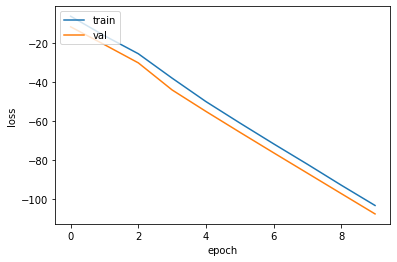

In [2]:
def setup_FCN_1():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(4, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_1()

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=100)
model.save('models/small_IQR_FCN1.h5')

plot_history(history)

Epoch 1/10
810/810 [==============================] - 2s 2ms/step - loss: -8.8618 - accuracy: 0.1224 - val_loss: -18.5189 - val_accuracy: 0.1189
Epoch 2/10
810/810 [==============================] - 1s 2ms/step - loss: -26.9389 - accuracy: 0.1169 - val_loss: -34.5007 - val_accuracy: 0.1189
Epoch 3/10
810/810 [==============================] - 1s 2ms/step - loss: -42.4467 - accuracy: 0.1169 - val_loss: -49.4874 - val_accuracy: 0.1189
Epoch 4/10
810/810 [==============================] - 1s 2ms/step - loss: -59.4772 - accuracy: 0.1169 - val_loss: -68.9853 - val_accuracy: 0.1189
Epoch 5/10
810/810 [==============================] - 1s 2ms/step - loss: -79.9758 - accuracy: 0.1169 - val_loss: -91.0351 - val_accuracy: 0.1189
Epoch 6/10
810/810 [==============================] - 1s 2ms/step - loss: -102.2251 - accuracy: 0.1169 - val_loss: -111.0208 - val_accuracy: 0.1189
Epoch 7/10
810/810 [==============================] - 1s 2ms/step - loss: -121.2935 - accuracy: 0.1169 - val_loss: -130.133

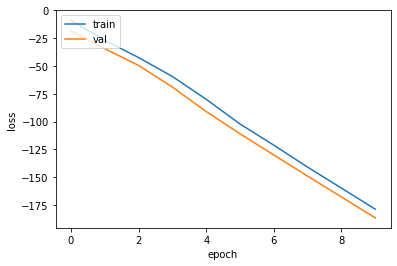

In [3]:
def setup_FCN_2():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(8, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_2()

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=100)
model.save('models/small_IQR_FCN2.h5')

plot_history(history)

Epoch 1/10
810/810 [==============================] - 2s 2ms/step - loss: -32.1958 - accuracy: 0.1174 - val_loss: -70.0047 - val_accuracy: 0.1189
Epoch 2/10
810/810 [==============================] - 1s 2ms/step - loss: -109.6752 - accuracy: 0.1169 - val_loss: -156.0925 - val_accuracy: 0.1189
Epoch 3/10
810/810 [==============================] - 1s 2ms/step - loss: -190.3745 - accuracy: 0.1169 - val_loss: -229.2526 - val_accuracy: 0.1189
Epoch 4/10
810/810 [==============================] - 1s 1ms/step - loss: -263.5715 - accuracy: 0.1169 - val_loss: -299.9763 - val_accuracy: 0.1189
Epoch 5/10
810/810 [==============================] - 1s 2ms/step - loss: -335.0836 - accuracy: 0.1169 - val_loss: -369.8021 - val_accuracy: 0.1189
Epoch 6/10
810/810 [==============================] - 1s 2ms/step - loss: -406.3322 - accuracy: 0.1169 - val_loss: -439.2611 - val_accuracy: 0.1189
Epoch 7/10
810/810 [==============================] - 1s 1ms/step - loss: -477.1440 - accuracy: 0.1169 - val_loss:

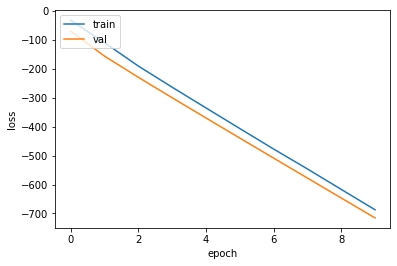

In [4]:
def setup_FCN_3():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(32, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_3()

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=100)
model.save('models/small_IQR_FCN3.h5')

plot_history(history)

Epoch 1/10
810/810 [==============================] - 2s 2ms/step - loss: -13.3792 - accuracy: 0.1241 - val_loss: -29.0228 - val_accuracy: 0.1189
Epoch 2/10
810/810 [==============================] - 1s 2ms/step - loss: -45.1426 - accuracy: 0.1169 - val_loss: -59.8016 - val_accuracy: 0.1189
Epoch 3/10
810/810 [==============================] - 1s 2ms/step - loss: -74.6101 - accuracy: 0.1169 - val_loss: -87.8781 - val_accuracy: 0.1189
Epoch 4/10
810/810 [==============================] - 1s 2ms/step - loss: -102.7461 - accuracy: 0.1169 - val_loss: -115.4296 - val_accuracy: 0.1189
Epoch 5/10
810/810 [==============================] - 1s 2ms/step - loss: -133.0906 - accuracy: 0.1169 - val_loss: -147.6348 - val_accuracy: 0.1189
Epoch 6/10
810/810 [==============================] - 1s 2ms/step - loss: -166.0134 - accuracy: 0.1169 - val_loss: -182.1998 - val_accuracy: 0.1189
Epoch 7/10
810/810 [==============================] - 1s 2ms/step - loss: -201.7872 - accuracy: 0.1169 - val_loss: -21

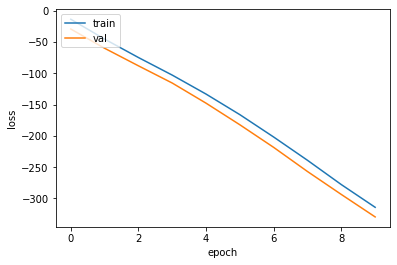

In [5]:
def setup_FCN_4():

    # Swquential Model is used.
    model = tf.keras.Sequential()

    # Consist of 4 Layers of nodes.
    # First layer consist of 2 nodes, to receive 2 inputs
    # Second layer consist of 12 nodes.
    # Third layer consist of  12 nodes.
    # Last Layer consist of 1 node, to output either 0 or 1
    # We are using binary_crossentropy as the loss function, hence the last layer is setup that way.

    model.add(tf.keras.layers.Dense(2, input_shape=(None, 2), activation='relu'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.25))
    model.add(tf.keras.layers.Dense(16, activation='sigmoid'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    # Compile the model using binary_crossentropy.
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

    # return the model after compilation
    return model

# Create and setting up the model using setup_FCN()
model = setup_FCN_4()

# Use model.fit to train it. As we have a very large dataset, we do not have to train it multiple times.
history = model.fit(pd_train_data, pd_train_data_target, validation_data=(pd_test_data, pd_test_data_target), epochs=10, batch_size=100)
model.save('models/small_IQR_FCN4.h5')

plot_history(history)

In [6]:
predict = model.predict(np.array([[65000, 0]]))
print(predict)

[[1.]]
